# [Facebook Prophet](https://github.com/facebook/prophet) and [NeuralProphet](https://github.com/ourownstory/neural_prophet) Comparison
By: Rayhan Ozzy Ertarto

The goal of this notebook is to compare the *expected values* forecasted by these two models and compare them against the actuals in order to calculate the performance metrics and define which model performs better using this time series dataset (Water Level in Ancol Flushing Floodgate, Central Jakarta)

Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(1234)

In [3]:
plt.style.use('ggplot')

Reading the time series

In [4]:
gsheetkey = "1d0g-fOczYG3WGt3CpmAQzTfT4S0q4MI5BCtHR2HvQoE"

url=f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey}&output=csv'
df_tma = pd.read_csv(url)
df_tma.head(10)

,id,pintu_air_id,nama_pintu_air,ketinggian,status_siaga,cuaca,tanggal_laporan,jam_laporan,status_bukaan,tinggi_bukaan,keterangan,delete_at,created_at,updated_at
0,1,4,Cideng Tarakan,0,4,Terang,11/17/2021,3:00:00,"[""T"",""T"",""T""]","[""1"",""1"",""1""]",NaN,NaN,11/16/2021 20:37,11/16/2021 20:37
1,2,12,Pasar Ikan - Laut,190,3,Terang,11/17/2021,3:00:00,"[""T"",""T"",""T"",""T""]","[null,null,null,null]",NaN,NaN,11/16/2021 20:43,11/16/2021 20:43
2,3,4,Cideng Tarakan,0,4,Terang,11/17/2021,4:00:00,"[""T"",""T"",""T""]","[""1"",""1"",""1""]",NaN,NaN,11/16/2021 20:43,11/16/2021 20:43
3,4,15,Istiqlal,160,4,Terang,11/17/2021,3:00:00,"[""F"",""F"",""F""]","[""400"",""400"",""400""]",NaN,NaN,11/16/2021 20:44,11/16/2021 20:44
4,5,6,Manggarai BKB,580,4,Terang,11/17/2021,3:00:00,"[""F"",""F"",""F""]","[""800"",""800"",""800""]",NaN,NaN,11/16/2021 20:45,11/16/2021 20:45
5,6,7,Manggarai KCL,550,4,Terang,11/17/2021,3:00:00,"[""B""]","[""100""]",NaN,NaN,11/16/2021 20:46,11/16/2021 20:46
6,7,5,PA. Karet,250,4,Terang,11/17/2021,3:00:00,"[""F"",""F"",""F"",""F"",""F""]","[""700"",""700"",""700"",""700"",""700""]",NaN,NaN,11/16/2021 20:49,11/16/2021 20:49
7,8,14,PA. Marina,187,3,Terang,11/17/2021,3:00:00,"[""F"",""F"",""T"",""T"",""T""]","[""300"",""300"",null,null,null]",NaN,NaN,11/16/2021 20:49,11/16/2021 20:49
8,9,13,Ancol Flushing,188,3,Terang,11/17/2021,3:00:00,"[""T"",""T""]","[null,null]",NaN,NaN,11/16/2021 20:49,11/16/2021 20:49
9,10,16,Jembatan Merah arah Marina,130,4,Terang,11/17/2021,3:00:00,"[""F"",""F"",""F"",""F""]","[""300"",""300"",""300"",""300""]",NaN,NaN,11/16/2021 20:52,11/16/2021 20:52


In [5]:
df_tma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30556 entries, 0 to 30555
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               30556 non-null  object 
 1   pintu_air_id     30556 non-null  int64  
 2   nama_pintu_air   30556 non-null  object 
 3   ketinggian       30556 non-null  object 
 4   status_siaga     30556 non-null  int64  
 5   cuaca            30556 non-null  object 
 6   tanggal_laporan  30556 non-null  object 
 7   jam_laporan      30556 non-null  object 
 8   status_bukaan    30556 non-null  object 
 9   tinggi_bukaan    30556 non-null  object 
 10  keterangan       334 non-null    object 
 11  delete_at        0 non-null      float64
 12  created_at       30556 non-null  object 
 13  updated_at       30556 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 3.3+ MB


In [6]:
df_tma = df_tma[['pintu_air_id','nama_pintu_air','ketinggian','jam_laporan','updated_at']]
df_tma.head(10)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,updated_at
0,4,Cideng Tarakan,0,3:00:00,11/16/2021 20:37
1,12,Pasar Ikan - Laut,190,3:00:00,11/16/2021 20:43
2,4,Cideng Tarakan,0,4:00:00,11/16/2021 20:43
3,15,Istiqlal,160,3:00:00,11/16/2021 20:44
4,6,Manggarai BKB,580,3:00:00,11/16/2021 20:45
5,7,Manggarai KCL,550,3:00:00,11/16/2021 20:46
6,5,PA. Karet,250,3:00:00,11/16/2021 20:49
7,14,PA. Marina,187,3:00:00,11/16/2021 20:49
8,13,Ancol Flushing,188,3:00:00,11/16/2021 20:49
9,16,Jembatan Merah arah Marina,130,3:00:00,11/16/2021 20:52


In [7]:
df_tma['updated_at'] = pd.to_datetime(df_tma['updated_at']).dt.date
df_tma.head(10)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,updated_at
0,4,Cideng Tarakan,0,3:00:00,2021-11-16
1,12,Pasar Ikan - Laut,190,3:00:00,2021-11-16
2,4,Cideng Tarakan,0,4:00:00,2021-11-16
3,15,Istiqlal,160,3:00:00,2021-11-16
4,6,Manggarai BKB,580,3:00:00,2021-11-16
5,7,Manggarai KCL,550,3:00:00,2021-11-16
6,5,PA. Karet,250,3:00:00,2021-11-16
7,14,PA. Marina,187,3:00:00,2021-11-16
8,13,Ancol Flushing,188,3:00:00,2021-11-16
9,16,Jembatan Merah arah Marina,130,3:00:00,2021-11-16


In [8]:
df_tma = df_tma.rename(columns={'updated_at': 'tanggal'})
df_tma.head(10)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,tanggal
0,4,Cideng Tarakan,0,3:00:00,2021-11-16
1,12,Pasar Ikan - Laut,190,3:00:00,2021-11-16
2,4,Cideng Tarakan,0,4:00:00,2021-11-16
3,15,Istiqlal,160,3:00:00,2021-11-16
4,6,Manggarai BKB,580,3:00:00,2021-11-16
5,7,Manggarai KCL,550,3:00:00,2021-11-16
6,5,PA. Karet,250,3:00:00,2021-11-16
7,14,PA. Marina,187,3:00:00,2021-11-16
8,13,Ancol Flushing,188,3:00:00,2021-11-16
9,16,Jembatan Merah arah Marina,130,3:00:00,2021-11-16


In [9]:
df_tma['jam_laporan'] = pd.to_datetime(df_tma.jam_laporan).dt.strftime('%H:%M')
df_tma.head(10)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,tanggal
0,4,Cideng Tarakan,0,03:00,2021-11-16
1,12,Pasar Ikan - Laut,190,03:00,2021-11-16
2,4,Cideng Tarakan,0,04:00,2021-11-16
3,15,Istiqlal,160,03:00,2021-11-16
4,6,Manggarai BKB,580,03:00,2021-11-16
5,7,Manggarai KCL,550,03:00,2021-11-16
6,5,PA. Karet,250,03:00,2021-11-16
7,14,PA. Marina,187,03:00,2021-11-16
8,13,Ancol Flushing,188,03:00,2021-11-16
9,16,Jembatan Merah arah Marina,130,03:00,2021-11-16


In [10]:
df_tma_jakut = df_tma.loc[(df_tma['pintu_air_id'] == 12) | (df_tma['pintu_air_id'] == 13) |
                           (df_tma['pintu_air_id'] == 17)]
df_tma_jakut.head(20)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,tanggal
1,12,Pasar Ikan - Laut,190,03:00,2021-11-16
8,13,Ancol Flushing,188,03:00,2021-11-16
11,17,Tangki,180,03:00,2021-11-16
19,12,Pasar Ikan - Laut,195,04:00,2021-11-16
20,17,Tangki,150,04:00,2021-11-16
23,13,Ancol Flushing,194,04:00,2021-11-16
35,12,Pasar Ikan - Laut,205,05:00,2021-11-16
38,17,Tangki,150,05:00,2021-11-16
39,13,Ancol Flushing,200,05:00,2021-11-16
45,12,Pasar Ikan - Laut,218,06:00,2021-11-16


In [11]:
df_tma_anc = df_tma_jakut.loc[(df_tma['pintu_air_id'] == 13)]
df_tma_anc.head(10)

,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,tanggal
8,13,Ancol Flushing,188,03:00,2021-11-16
23,13,Ancol Flushing,194,04:00,2021-11-16
39,13,Ancol Flushing,200,05:00,2021-11-16
47,13,Ancol Flushing,212,07:00,2021-11-16
48,13,Ancol Flushing,212,07:00,2021-11-16
89,13,Ancol Flushing,211,08:00,2021-11-17
110,13,Ancol Flushing,213,09:00,2021-11-17
119,13,Ancol Flushing,214,10:00,2021-11-17
148,13,Ancol Flushing,201,12:00,2021-11-17
149,13,Ancol Flushing,197,13:00,2021-11-17


In [12]:
df_tma_anc['tanggal'] = df_tma_anc['tanggal'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_tma_anc['ketinggian'] = df_tma_anc['ketinggian'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_tma_anc['waktu'] = df_tma_anc[['tanggal','jam_laporan']].agg(' '.join,axis=1)
df_tma_anc.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pintu_air_id,nama_pintu_air,ketinggian,jam_laporan,tanggal,waktu
8,13,Ancol Flushing,188,03:00,2021-11-16,2021-11-16 03:00
23,13,Ancol Flushing,194,04:00,2021-11-16,2021-11-16 04:00
39,13,Ancol Flushing,200,05:00,2021-11-16,2021-11-16 05:00
47,13,Ancol Flushing,212,07:00,2021-11-16,2021-11-16 07:00
48,13,Ancol Flushing,212,07:00,2021-11-16,2021-11-16 07:00
89,13,Ancol Flushing,211,08:00,2021-11-17,2021-11-17 08:00
110,13,Ancol Flushing,213,09:00,2021-11-17,2021-11-17 09:00
119,13,Ancol Flushing,214,10:00,2021-11-17,2021-11-17 10:00
148,13,Ancol Flushing,201,12:00,2021-11-17,2021-11-17 12:00
149,13,Ancol Flushing,197,13:00,2021-11-17,2021-11-17 13:00


In [15]:
df_tma_anc = df_tma_anc[['waktu','ketinggian']]
df_tma_anc.head(10)

,waktu,ketinggian
8,2021-11-16 03:00,188
23,2021-11-16 04:00,194
39,2021-11-16 05:00,200
47,2021-11-16 07:00,212
48,2021-11-16 07:00,212
89,2021-11-17 08:00,211
110,2021-11-17 09:00,213
119,2021-11-17 10:00,214
148,2021-11-17 12:00,201
149,2021-11-17 13:00,197


In [16]:
df_tma_anc.drop_duplicates(subset='waktu',keep='first',inplace=True)
df_tma_anc.head()

,waktu,ketinggian
8,2021-11-16 03:00,188
23,2021-11-16 04:00,194
39,2021-11-16 05:00,200
47,2021-11-16 07:00,212
89,2021-11-17 08:00,211


In [17]:
# Renaming columns
df_tma_anc.rename(columns = {'waktu':'ds', 'ketinggian':'y'}, inplace = True)
df_tma_anc.head()

,ds,y
8,2021-11-16 03:00,188
23,2021-11-16 04:00,194
39,2021-11-16 05:00,200
47,2021-11-16 07:00,212
89,2021-11-17 08:00,211


In [18]:
df_tma_anc_time = df_tma_anc.set_index('ds')
df_tma_anc_time.head()

,y
ds,
2021-11-16 03:00,188
2021-11-16 04:00,194
2021-11-16 05:00,200
2021-11-16 07:00,212
2021-11-17 08:00,211


In [ ]:
#Plot of decompotition
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_tma_anc_time, 
                                         model = 'additive',
                                         period=60) 
fig = decomposition.plot()
plt.show()

In [ ]:
df_tma_anc['ds'] = pd.DatetimeIndex(df_tma_anc['ds'])
df_tma_anc.info()

In [ ]:
df_tma_anc.head(10)

In [ ]:
df_tma_anc.tail(10)

In [ ]:
#df_tma_anc.set_index('ds').plot(figsize=(12,6))
#plt.title('Time Series Plot')

## Prophet Model

In [24]:
!pip install prophet -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [25]:
from prophet import Prophet

In [26]:
m = Prophet(seasonality_mode='additive')

Using default settings, only the seasonality mode is set to *Additive*



In [27]:
m.fit(df_tma_anc)

Initial log joint probability = -8.57226


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5140.74    0.00137826       235.524      0.2214           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5142.68   0.000170438       107.844           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       5143.51   8.29652e-05        119.68   5.246e-07       0.001      379  LS failed, Hessian reset 
     299       5144.26    0.00103878       85.0084           1           1      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     337       5144.42   0.000177377       192.029   1.655e-06       0.001      527  LS failed, Hessian reset 
     373       5144.44   3.98106e-07       75.1393      0.8519      0.8519      575   
Optimization terminated normally: 
  Convergence detected: rel

In [28]:
future = m.make_future_dataframe(periods=1440, freq='H')

In [29]:
future.tail(5)

,ds
3428,2022-04-19 10:00:00
3429,2022-04-19 11:00:00
3430,2022-04-19 12:00:00
3431,2022-04-19 13:00:00
3432,2022-04-19 14:00:00


In [30]:
forecast = m.predict(future)

In [31]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3428,2022-04-19 10:00:00,189.367904,158.167325,223.643834,162.846701,212.557420,3.454242,3.454242,3.454242,3.893769,3.893769,3.893769,-0.439527,-0.439527,-0.439527,0.0,0.0,0.0,192.822146
3429,2022-04-19 11:00:00,189.391997,158.571370,224.819008,162.838062,212.607639,2.905714,2.905714,2.905714,3.166590,3.166590,3.166590,-0.260876,-0.260876,-0.260876,0.0,0.0,0.0,192.297711
3430,2022-04-19 12:00:00,189.416091,159.253086,223.806673,162.829424,212.659300,3.294824,3.294824,3.294824,3.363924,3.363924,3.363924,-0.069101,-0.069101,-0.069101,0.0,0.0,0.0,192.710914
3431,2022-04-19 13:00:00,189.440184,158.436578,226.692363,162.820785,212.710960,4.337858,4.337858,4.337858,4.203703,4.203703,4.203703,0.134156,0.134156,0.134156,0.0,0.0,0.0,193.778042
3432,2022-04-19 14:00:00,189.464277,161.554552,226.723446,162.812147,212.762026,5.248260,5.248260,5.248260,4.901169,4.901169,4.901169,0.347091,0.347091,0.347091,0.0,0.0,0.0,194.712537


Text(60.125, 0.5, 'Water Level (cm)')

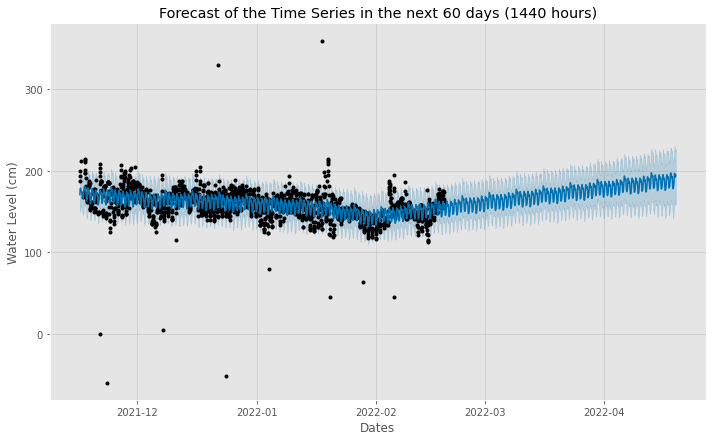

In [32]:
m.plot(forecast);
plt.title("Forecast of the Time Series in the next 60 days (1440 hours)")
plt.xlabel("Dates")
plt.ylabel("Water Level (cm)")

Components of the time series:


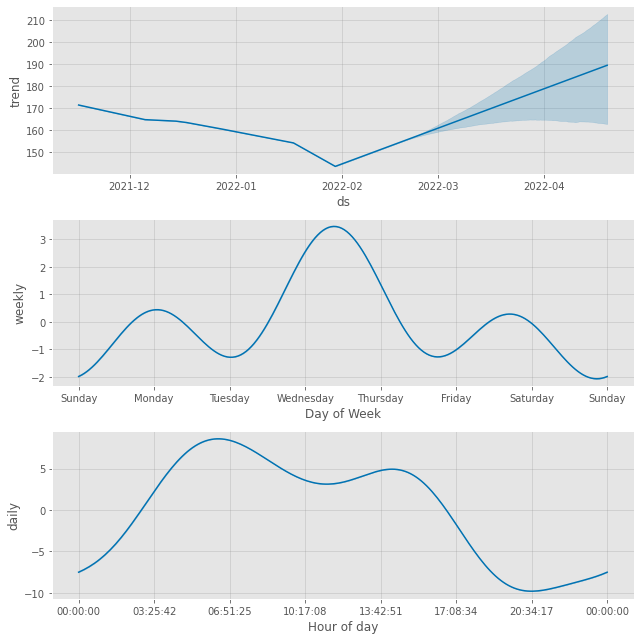

In [33]:
m.plot_components(forecast);
print("Components of the time series:")

In [34]:
#p_forecast = forecast[forecast['ds']>'2022-02-18 16:00:00'][['ds','yhat_lower','yhat','yhat_upper']]
p_forecast = forecast[['ds','yhat_lower','yhat','yhat_upper']]
p_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          3433 non-null   datetime64[ns]
 1   yhat_lower  3433 non-null   float64       
 2   yhat        3433 non-null   float64       
 3   yhat_upper  3433 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 107.4 KB


Text(0, 0.5, 'Water Level (cm)')

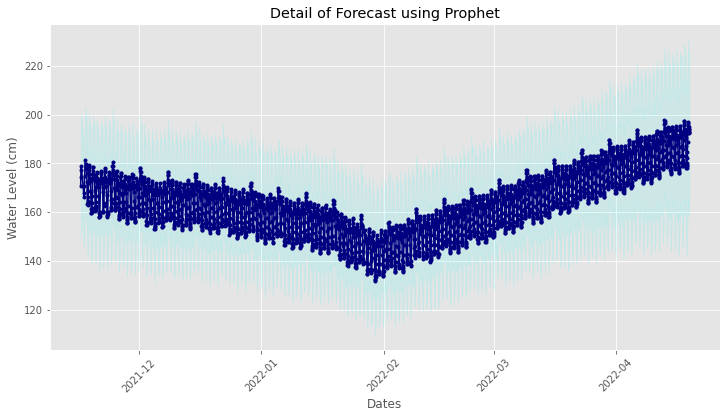

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Detail of Forecast using Prophet")
plt.plot(p_forecast['ds'], p_forecast['yhat'], marker='.', c='navy')
plt.fill_between(p_forecast['ds'],p_forecast['yhat_lower'], p_forecast['yhat_upper'], alpha=0.1, color='cyan')
plt.xlabel("Dates")
plt.ylabel("Water Level (cm)")

### Performance Metrics

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
df_tma_anc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 8 to 30525
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1993 non-null   datetime64[ns]
 1   y       1993 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 46.7 KB


In [38]:
df_tma_anc_merge = pd.merge(df_tma_anc, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_tma_anc_merge = df_tma_anc_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_tma_anc_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2021-11-16 03:00:00,149.338800,191.586822,170.764073,188
1,2021-11-16 04:00:00,154.017957,196.698401,174.561380,194
2,2021-11-16 05:00:00,156.738101,199.551727,177.470921,200
3,2021-11-16 07:00:00,158.646780,200.389365,178.773267,212
4,2021-11-17 08:00:00,159.555016,203.092277,181.471750,211


In [39]:
df_tma_anc_merge.tail()

,ds,yhat_lower,yhat_upper,yhat,y
1988,2022-02-18 10:00:00,138.198822,179.957276,158.528785,162
1989,2022-02-18 11:00:00,137.348261,178.650090,157.905966,160
1990,2022-02-18 12:00:00,135.966105,179.409789,158.198033,156
1991,2022-02-18 13:00:00,138.283558,179.031704,159.121681,163
1992,2022-02-18 14:00:00,138.346805,181.110877,159.891083,174


In [40]:
prophet_mse = mean_squared_error(df_tma_anc_merge['y'], df_tma_anc_merge['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(df_tma_anc_merge['y'], df_tma_anc_merge['yhat']))

In [41]:
print("Prophet MSE: {:.4f}".format(prophet_mse))
print("Prophet RMSE: {:.4f}".format(prophet_rmse))

Prophet MSE: 269.4433
Prophet RMSE: 16.4147


## NeuralProphet

In [42]:
!pip install neuralprophet -q

In [43]:
from neuralprophet import NeuralProphet, set_random_seed

In [44]:
set_random_seed(42)

In [45]:
nm = NeuralProphet(seasonality_mode='additive')

In [46]:
nm.fit(df_tma_anc, freq='H')

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 90.968% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 158


  0%|          | 0/133 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.31E-02, min: 1.23E+00


  0%|          | 0/133 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.57E-01, min: 1.44E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.23E-01
Epoch[158/158]: 100%|██████████| 158/158 [00:16<00:00,  9.67it/s, SmoothL1Loss=0.00222, MAE=9.7, RMSE=14.2, RegLoss=0] 


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.732371,277.049911,341.955740,0.0
1,0.614683,246.540602,303.585936,0.0
2,0.490637,213.503579,260.692665,0.0
3,0.352537,175.257685,212.765285,0.0
4,0.210597,133.261880,158.225493,0.0
...,...,...,...,...
153,0.002243,9.739123,14.320897,0.0
154,0.002236,9.757182,14.269255,0.0
155,0.002228,9.703415,14.427414,0.0
156,0.002226,9.706246,14.352446,0.0


In [47]:
n_future = nm.make_future_dataframe(df_tma_anc, periods=1440, n_historic_predictions=len(df_tma_anc))
n_future

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 85.349% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


,ds,y
0,2021-11-16 03:00:00,188
1,2021-11-16 04:00:00,194
2,2021-11-16 05:00:00,200
3,2021-11-16 07:00:00,212
4,2021-11-17 00:00:00,168
...,...,...
3428,2022-04-19 10:00:00,None
3429,2022-04-19 11:00:00,None
3430,2022-04-19 12:00:00,None
3431,2022-04-19 13:00:00,None


In [48]:
n_future.tail()

,ds,y
3428,2022-04-19 10:00:00,None
3429,2022-04-19 11:00:00,None
3430,2022-04-19 12:00:00,None
3431,2022-04-19 13:00:00,None
3432,2022-04-19 14:00:00,None


In [49]:
n_forecast = nm.predict(n_future)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 94.757% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 94.757% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


In [50]:
n_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             3433 non-null   datetime64[ns]
 1   y              1993 non-null   object        
 2   yhat1          3433 non-null   float64       
 3   residual1      1993 non-null   object        
 4   trend          3433 non-null   float64       
 5   season_weekly  3433 non-null   float64       
 6   season_daily   3433 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 187.9+ KB


In [51]:
n_forecast.tail()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
3428,2022-04-19 10:00:00,None,215.662537,NaN,211.677856,0.055481,3.929208
3429,2022-04-19 11:00:00,None,215.071838,NaN,211.715790,0.275376,3.080703
3430,2022-04-19 12:00:00,None,216.009949,NaN,211.753723,0.502977,3.753252
3431,2022-04-19 13:00:00,None,217.794647,NaN,211.791656,0.736348,5.266654
3432,2022-04-19 14:00:00,None,218.068848,NaN,211.829590,0.973459,5.265784


Text(0, 0.5, 'Water Level (cm)')

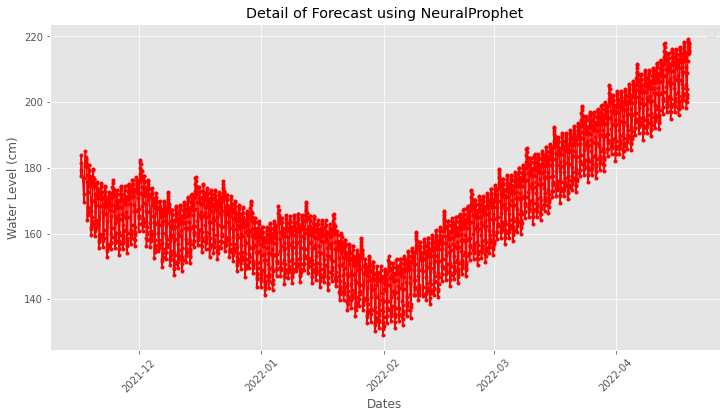

In [52]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Detail of Forecast using NeuralProphet")
plt.plot(n_forecast['ds'], n_forecast['yhat1'], marker='.', c='red')
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Water Level (cm)")

Text(60.125, 0.5, 'Water Level (cm)')

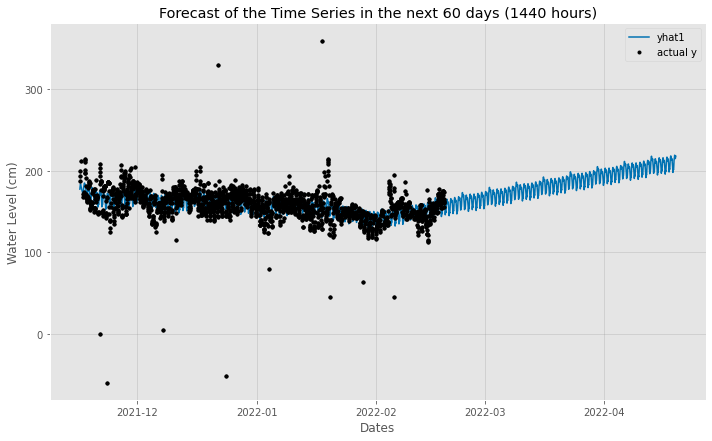

In [53]:
nm.plot(pd.concat([df_tma_anc, n_forecast], ignore_index=True));
plt.title("Forecast of the Time Series in the next 60 days (1440 hours)")
plt.xlabel("Dates")
plt.ylabel("Water Level (cm)")

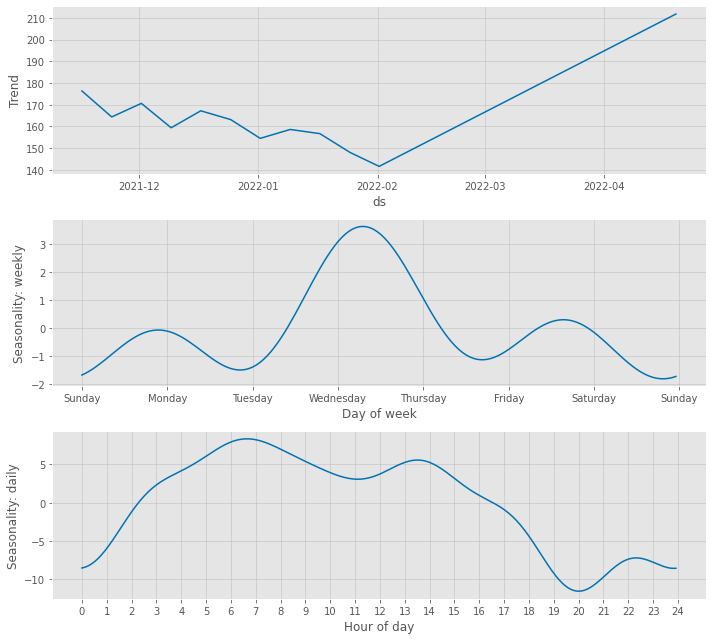

In [54]:
nm.plot_components(pd.concat([df_tma_anc, n_forecast], ignore_index=True));

### Performance Metrics

In [55]:
n_forecast

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
0,2021-11-16 03:00:00,188,177.547012,-10.452988,176.354050,-1.134345,2.327322
1,2021-11-16 04:00:00,194,179.442673,-14.557327,176.289352,-1.010618,4.163929
2,2021-11-16 05:00:00,200,181.423340,-18.57666,176.224670,-0.869842,6.068499
3,2021-11-16 07:00:00,212,183.783371,-28.216629,176.095306,-0.540478,8.228549
4,2021-11-17 00:00:00,168,169.560791,1.560791,174.995667,3.083025,-8.517905
...,...,...,...,...,...,...,...
3428,2022-04-19 10:00:00,None,215.662537,NaN,211.677856,0.055481,3.929208
3429,2022-04-19 11:00:00,None,215.071838,NaN,211.715790,0.275376,3.080703
3430,2022-04-19 12:00:00,None,216.009949,NaN,211.753723,0.502977,3.753252
3431,2022-04-19 13:00:00,None,217.794647,NaN,211.791656,0.736348,5.266654


In [56]:
n_forecast_merge = pd.merge(df_tma_anc, n_forecast[['ds','yhat1','residual1']],on='ds')
n_forecast_merge = n_forecast_merge[['ds','yhat1','residual1','y']]
n_forecast_merge.head()

,ds,yhat1,residual1,y
0,2021-11-16 03:00:00,177.547012,-10.452988,188
1,2021-11-16 04:00:00,179.442673,-14.557327,194
2,2021-11-16 05:00:00,181.423340,-18.57666,200
3,2021-11-16 07:00:00,183.783371,-28.216629,212
4,2021-11-17 08:00:00,185.087250,-25.91275,211


In [57]:
n_prophet_mse = mean_squared_error(n_forecast_merge['y'], n_forecast_merge['yhat1'])
n_prophet_rmse = np.sqrt(mean_squared_error(n_forecast_merge['y'], n_forecast_merge['yhat1']))

In [58]:
print("Neural Prophet MSE: {:.4f}".format(n_prophet_mse))
print("Neural Prophet RMSE: {:.4f}".format(n_prophet_rmse))

Neural Prophet MSE: 264.6797
Neural Prophet RMSE: 16.2690


In [59]:
print("Prophet MSE: {:.4f}".format(prophet_mse))
print("Prophet RMSE: {:.4f}".format(prophet_rmse))

Prophet MSE: 269.4433
Prophet RMSE: 16.4147


In [60]:
n_prophet_mse - prophet_mse

-4.763537544751841

In [61]:
n_prophet_rmse - prophet_rmse

-0.14574654140997367

Text(0, 0.5, 'Water Level (cm)')

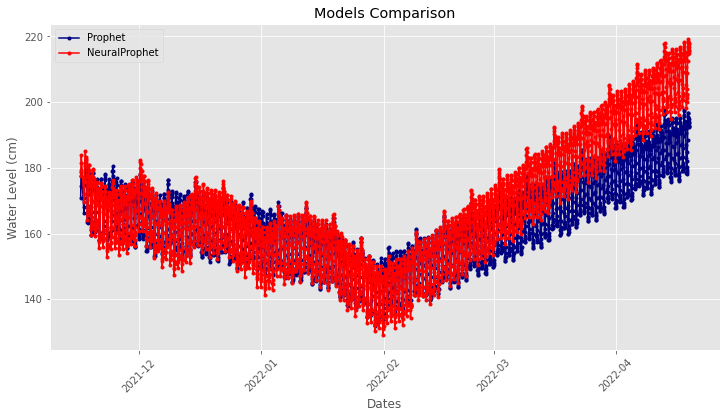

In [62]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Models Comparison")
plt.plot(p_forecast['ds'], p_forecast['yhat'], marker='.', c='navy', label='Prophet')
plt.plot(n_forecast['ds'], n_forecast['yhat1'], marker='.', c='red', label='NeuralProphet')
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Water Level (cm)")

In [63]:
pd.DataFrame({'metrics':['MSE','RMSE'],
              'Prophet ':[prophet_mse, prophet_rmse],
              'Neural Prophet':[n_prophet_mse, n_prophet_rmse]
             })

,metrics,Prophet,Neural Prophet
0,MSE,269.443288,264.679750
1,RMSE,16.414728,16.268981


## Final Comments

*   At least for this particular dataset and using the default arguments,  the **NeuralProphet** model scored a **MSE** of **264.679741** and **RMSE** of **16.268981** whereas the **Prophet** model scored a **MSE** of **269.443288** and **RMSE** of **16.414728**, a **4.763546237988635 and 0.14574680858210698 difference of MSE and RMSE respectively** compared against the first model.